In [1]:
import pandas as pd  #pandas用于数据清洗
import numpy as np  #numpy用于矩阵运算
import matplotlib.pyplot as plt  #matplotlib用于作图，分析数据
import seaborn as sns  #seaborn用于高级作图，数据可视化
import re  #python中的正则表达式包
import patsy
import statsmodels.api as sm

from sklearn import linear_model
from sklearn.metrics import r2_score
from matplotlib.font_manager import FontProperties  #用于为matplotlib设置中文字体

机器学习 负责人：孙川

In [2]:
#为seaborn设置中文字体，没有下面两行的话seaborn和matplotlib作图不能显示中文
mfont = FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf', size=14)
sns.set(font = mfont.get_name())

expances_data = pd.read_csv('ml_data_cleaned')
expances_data = expances_data.drop('userid', axis=1)
expances_data.loc[:, '年龄段'] = expances_data['年龄段'].astype(int)

In [3]:
#使用透视图或分组分析多个变量之间的关系
#expances_data.pivot_table('近1年消费总笔数', '消费城市数量', '年龄段',  aggfunc='mean')

In [4]:
#f = '中间报价 ~ 性别 + 年龄段 + 借记卡数 + 贷记卡数 + 近1年单笔交易金额最大值 + 近1年消费总笔数 + 近1年消费总金额 + 消费城市数量'、
f = '中间报价 ~ 性别 + 年龄段 + 近1年单笔交易金额最大值 + 近1年消费总笔数 + 近1年消费总金额 + 消费城市数量'
#f = '中间报价 ~ 近1年消费总金额'
y, X = patsy.dmatrices(f, expances_data, return_type='dataframe')

results = sm.OLS(y, X).fit()
#print(results.summary())

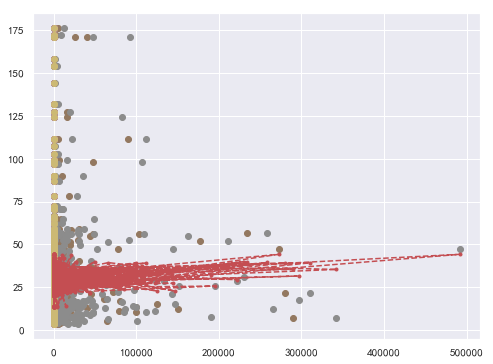

In [5]:
y_fitted = results.fittedvalues
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(X, y, 'o', label='data')
ax.plot(X, y_fitted, 'r--.',label='OLS')

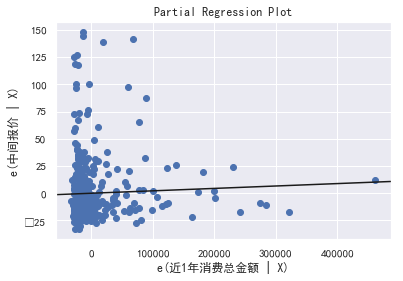

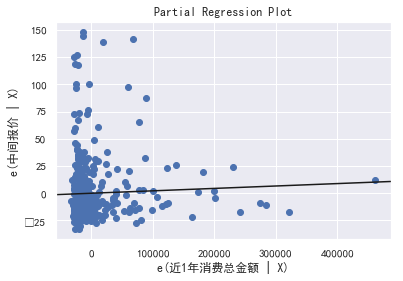

In [6]:
sm.graphics.plot_partregress('中间报价', '近1年消费总金额', ['性别', '年龄段'], data=expances_data, obs_labels=False)

In [7]:
expances = pd.read_csv('ml_data_cleaned')
expances = expances.drop('userid', axis=1)
expances.loc[:, '年龄段'] = expances['年龄段'].astype(int)
expances = expances.drop('近1年单笔交易金额最大值', axis=1)

In [8]:
f = '中间报价 ~ 性别 + 年龄段 + 借记卡数 + 贷记卡数 + 近1年消费总笔数 + 近1年消费总金额 + 消费城市数量'
#f = '中间报价 ~ 性别'
y, X = patsy.dmatrices(f, expances, return_type='dataframe')

results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   中间报价   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.741
Date:                Sun, 18 Nov 2018   Prob (F-statistic):             0.0977
Time:                        12:41:56   Log-Likelihood:                -2082.3
No. Observations:                 438   AIC:                             4181.
Df Residuals:                     430   BIC:                             4213.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.0422      6.862      3.067      0.0

In [9]:
#sm.graphics.plot_partregress('中间报价', '近1年消费总金额', ['性别', '年龄段'], data=expances, obs_labels=False)

In [10]:
X = expances.iloc[:, 1:].values
y = expances.iloc[:, 0].values

m = X.shape[0]  #数据集大小
X_train, y_train = X[:m  // 4 * 3], y[:m // 4 * 3]
X_test, y_test = X[m  // 4 * 3 :] , y[m // 4 * 3 :]

In [11]:
alpha = 0.1
reg_lasso = linear_model.Lasso(alpha=alpha, fit_intercept=True, normalize=True)
y_pred_lasso = reg_lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(reg_lasso)
print('r^2 score on test data: %f' % r2_score_lasso)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
r^2 score on test data: -0.005913


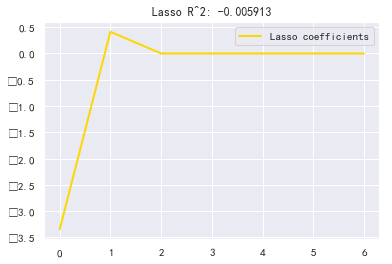

In [12]:
plt.plot(reg_lasso.coef_, color='gold', linewidth=2,
         label='Lasso coefficients')
#plt.plot(coef, '--', color='navy', label='original coefficients')
plt.legend(loc='best')
plt.title("Lasso R^2: %f" % r2_score_lasso)
plt.show()

In [13]:
v = [[0,5.0,1,1,4,10990.61,1]]
reg_lasso.predict(v)

array([30.67608631])

In [14]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio=0.7, normalize=True, max_iter=1000)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=True, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : -0.011506


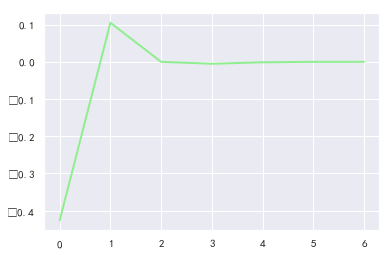

In [15]:
plt.plot(enet.coef_, color='lightgreen', linewidth=2,
         label='Elastic net coefficients')
plt.show()

In [16]:
v = [[0,5.0,1,1,4,10990.61,1]]
enet.predict(v)

array([28.48545894])

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linear', Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

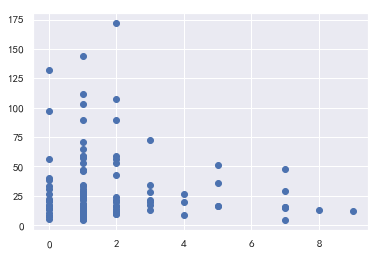

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    #('std_scaler', StandardScaler()),
    ('linear', linear_model.Lasso(alpha=alpha, fit_intercept=True, normalize=True))
])

model = model.fit(X_train, y_train)


y_predict = model.predict(X_test)
plt.scatter(X_test[:, 3], y_test)
model

#print(X_test)

In [18]:
import pickle

with open('lasso_model.pickle', 'wb') as fw:
    pickle.dump(reg_lasso, fw)

In [19]:
#X_train.tolist()